In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [7]:
# Definir la ruta donde se encuentran los archivos CSV
csv_dir = '/home/mariona/project/2-Frap-Lig/plot_rmsf'

# Encontrar todos los archivos CSV en el directorio
csv_files = glob.glob(os.path.join(csv_dir, '*.csv'))

In [8]:
# Diccionario de colores para asegurar que las réplicas correspondientes tengan el mismo color
colors = {
    'rmsf_rep1': 'blue',
    'rmsf_rep1_2': 'blue',
    'rmsf_rep2': 'green',
    'rmsf_rep2_2': 'green',
    'rmsf_rep3': 'orange',
    'rmsf_rep3_2': 'orange'
}

# Filtrar archivos para cada condición y ordenar de 1 a 3
files_10mM = sorted([f for f in csv_files if os.path.basename(f) in ['rmsf_rep1.csv', 'rmsf_rep2.csv', 'rmsf_rep3.csv']])
files_150mM = sorted([f for f in csv_files if os.path.basename(f) in ['rmsf_rep1_2.csv', 'rmsf_rep2_2.csv', 'rmsf_rep3_2.csv']])

def plot_rmsf(files, title):
    plt.figure(figsize=(10, 6))
    
    # Asegurarse de que los archivos se ploteen en el mismo orden (Replica 1, 2, 3)
    for file in files:
        df = pd.read_csv(file)
        file_name = os.path.splitext(os.path.basename(file))[0]
        
        # Asignar el color basado en el nombre del archivo
        color = colors.get(file_name, 'black')
        plt.plot(df['Atom Index'], df['RMSF'], marker='o', linestyle='-', color=color, label=file_name)
    
    # Personalizar la gráfica
    plt.xlabel('Atom Index', fontsize=16)
    plt.ylabel('RMSF (Å)', fontsize=16)
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Colocar la leyenda en el mismo orden
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles)))  # Ordenar la leyenda por el nombre del archivo
    plt.legend(handles, labels)
    
    # Otras configuraciones
    plt.grid(True)
    plt.ylim(3, 13)
    plt.yticks(range(4, 14, 1))
    plt.show()

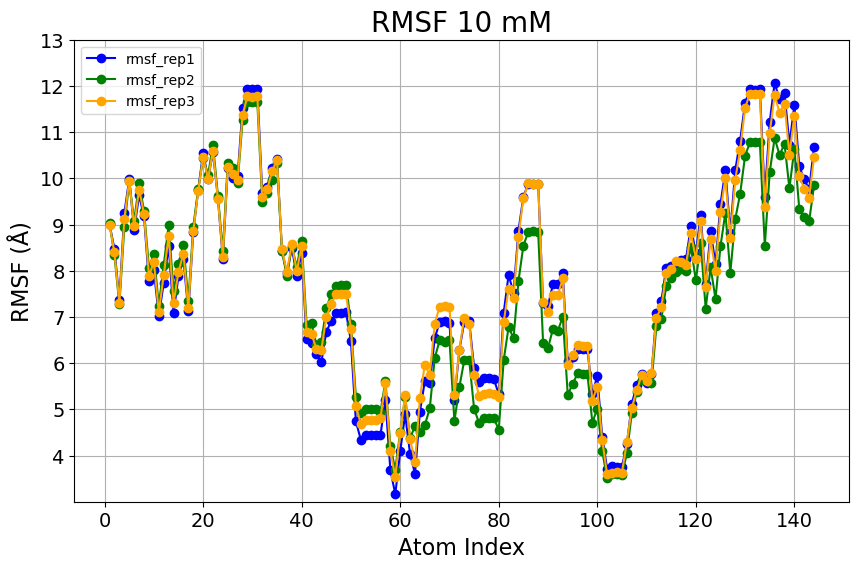

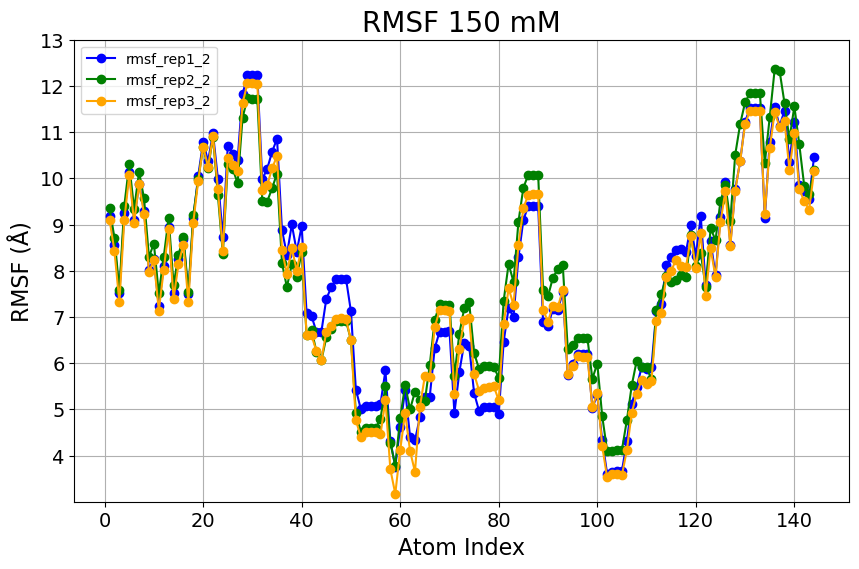

In [9]:
# Crear y mostrar gráficos
plot_rmsf(files_10mM, 'RMSF 10 mM')
plot_rmsf(files_150mM, 'RMSF 150 mM')